In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])


Linear regression with one variable

In [26]:
#1
data.head(5)


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [27]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 0, 'population')

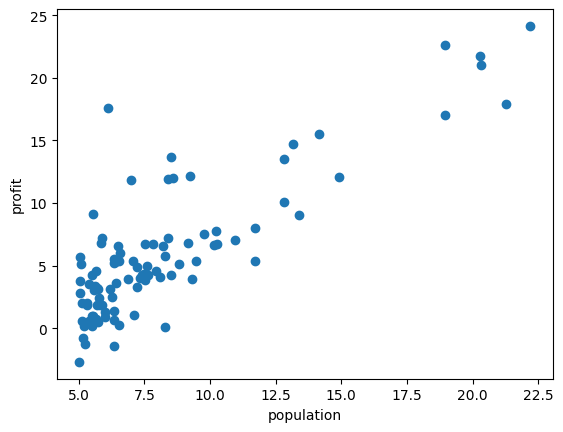

In [28]:
#2
x = data.values[:, 0]
y = data.values[:, 1]
plt.plot(x,y, 'o')
plt.ylabel('profit')
plt.xlabel('population')

In [29]:
#3 #4
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [30]:
#5
def computeCost(X, y, theta):
    return 1/(2*X.shape[1]) * np.sum(np.square(theta.T @ X - y))


In [31]:
#6
computeCost(X,y,theta)

32.072733877455676

In [32]:
#7
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        theta = theta - alpha * (1/len(y[0])) * X @ np.transpose(np.transpose(theta) @ X - y)
        cost.append(computeCost(X,y,theta))
    return theta, cost

In [33]:
#8
alpha = 0.01
it = 1000

theta, cost = simple_gradient(X, y, theta, alpha, it)

In [34]:
theta

array([[-3.24140214],
       [ 1.1272942 ]])

In [35]:
#9
computeCost(X,y,theta)

4.515955503078914

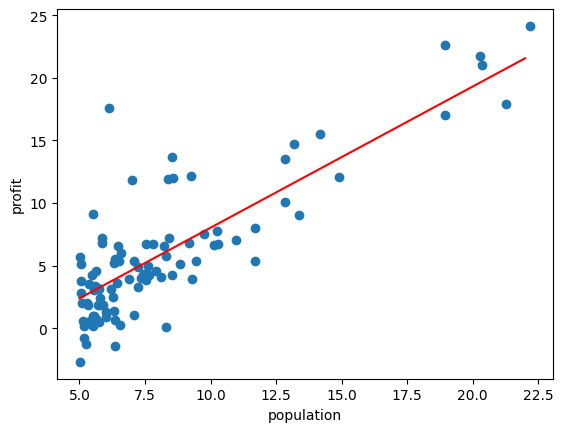

In [36]:
#10
a = theta[1]
b = theta[0]
x_lin = np.arange(5,23)
plt.plot(x_lin, x_lin*a + b, 'r')
plt.scatter(x, y)
plt.ylabel('profit')
plt.xlabel('population')
plt.show()

Text(0.5, 0, 'iteration')

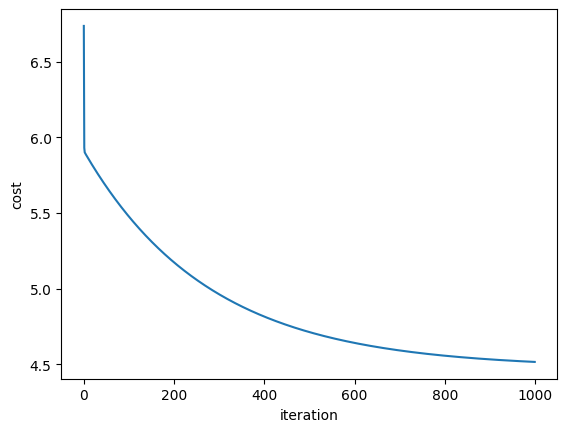

In [37]:
#11
iter = np.linspace(0,999,1000)
plt.plot(iter, cost)
plt.ylabel('cost')
plt.xlabel('iteration')

Linear regression with multiple variables

In [38]:
#1
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [39]:
for i in data2.columns:
    data2[i] = (data2[i] - data2[i].mean())/data2[i].std()

In [40]:
data2.head(10)

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [41]:
#2
x2 = data2.values[:, :2]
y2 = data2.values[:, 2]
ones_array = np.ones(x2.shape[0], dtype=np.float32)
ones_array.shape = [1,ones_array.shape[0]]
X2 = np.concatenate((ones_array.T,x2), axis=1).T
y2.shape = [1, y2.shape[0]]
theta2 = np.zeros((X2.shape[0], 1), dtype=np.float32)

In [42]:
computeCost(X2,y2,theta2)

0.4893617021276595

In [43]:
theta2, cost2 = simple_gradient(X2, y2, theta2, alpha, it)

In [44]:
theta2

array([[-1.10778357e-16],
       [ 8.78503652e-01],
       [-4.69166570e-02]])

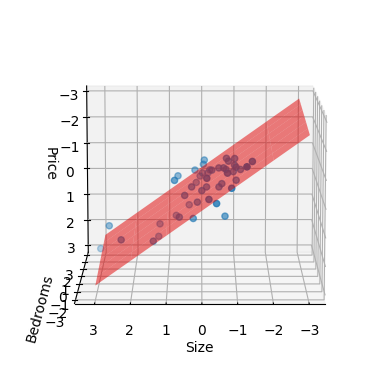

In [45]:
a = theta2[2]
b = theta2[1]
c = theta2[0]
x_lin, y_lin = np.meshgrid(range(-3,4), range(-3,4))
ax = plt.axes(projection ='3d')  
ax.scatter(data2["Size"], data2["Bedrooms"], data2['Price'])
ax.set_xlabel("Size")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.plot_surface(x_lin, y_lin, a * y_lin + b * x_lin + c,color='r',alpha=0.5)
ax.view_init(-170, 90)
plt.show()

Text(0, 0.5, 'cost')

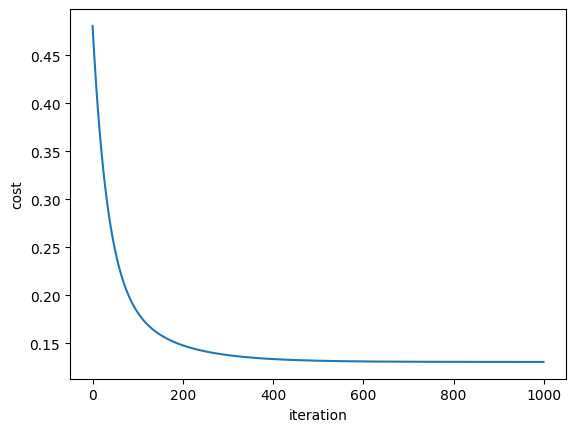

In [46]:
plt.plot(iter, cost2)
plt.xlabel('iteration')
plt.ylabel('cost')

In [47]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Linear regression - Python packages

In [49]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import

# Normalization
 
 
# Split into train and test sets (70-30%)
x = data2[['Size', 'Bedrooms']]
y = data2['Price']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=2)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.76215369 0.11269872]
Residual sum of squares: 0.26448980868526056
